In [ ]:
pip install graphviz

In [3]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [4]:
# Load the dataset
data = pd.read_excel('cleaned data.xlsx')

# Save as dataframe
data = pd.DataFrame(data)

In [8]:
# Split the data into features (X) and target (y)
X = data.drop('Take-up ind', axis=1)
y = data['Take-up ind']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test 

(       Pno  Amount    Cover  SurrVal  Offer/APE  PercCover    CurrAge  \
 287    288   17334    40271        0       15.4   0.430434  84.916667   
 854    855  115201  1000000        0       12.5   0.115201  69.500000   
 593    594   26317   200000     2570        5.9   0.131585  69.833333   
 680    681   97796  1058960     9686        4.3   0.092351  69.250000   
 1092  1093   41296   188118        0       15.0   0.219522  77.583333   
 ...    ...     ...      ...      ...        ...        ...        ...   
 1022  1023   72250   836391    18489       23.5   0.086383  59.416667   
 390    391   35865   176122    31842        9.8   0.203637  80.583333   
 124    125   17079   151825        0       13.0   0.112491  61.250000   
 57      58   21410   167181        0       12.8   0.128065  68.000000   
 134    135   24303   150000     1746       11.6   0.162020  74.000000   
 
       Fee_claimed  Smoker ind           APE  ...  Mngt_act_ACD  Mngt_act_BCD  \
 287             0           

In [30]:
#this code creates an instance of the RandomForestClassifier class and assigns it to the variable rf.
rf = RandomForestClassifier(n_estimators=100, random_state=42)
#fit the model to the training data X_train and y_train using the fit() method.
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
#Use the predict method of a RandomForestClassifier object (rf) to make predictions on a set of test data (X_test).
#The predicted values are then stored in the variable y_pred.
y_pred = rf.predict(X_test)

In [32]:
#Calculate the accuracy of predictions by comparing the predicted values (y_pred) to the actual values (y_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


Visualizing the results

In [ ]:
pip install pydotplus

In [34]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

Hyperparamter Tuning 

In [15]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000215419F5240>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002154139F6A0>})

In [16]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)


Best hyperparameters: {'max_depth': 11, 'n_estimators': 318}


More Evaluation metrics 


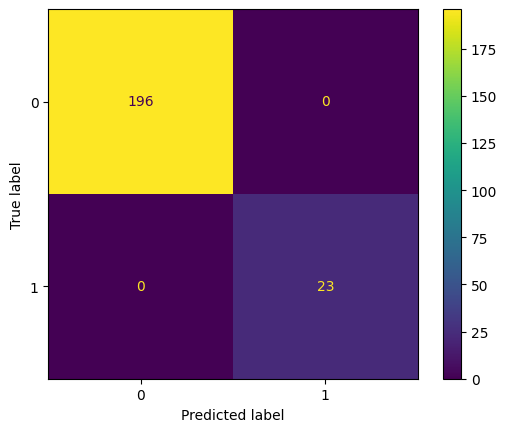

In [17]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
# Define the kNN model
knn = KNeighborsClassifier(n_neighbors=3)

# Train the kNN model
knn.fit(X_test, y_pred)  # Ensure the model is fitted before making predictions

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8904109589041096
Precision: 0.0
Recall: 0.0


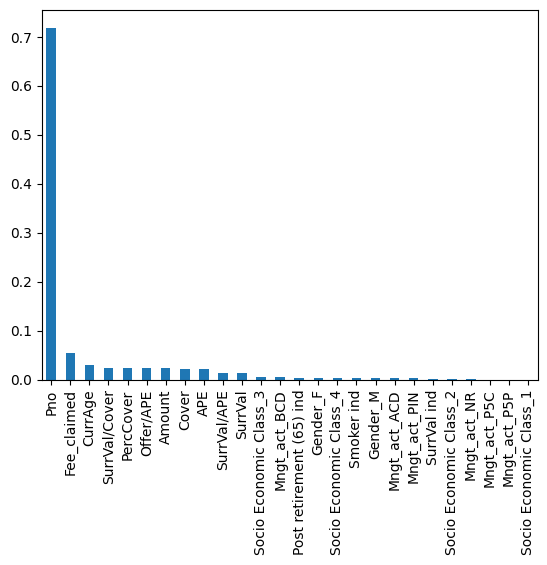

In [24]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot bar chart
feature_importances.plot.bar();